## **Importing Packages**

In [32]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
# from sklearn.impute import SimpleImputer

df = pd.read_csv('in-vehicle-coupon-recommendation.csv')
df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [34]:
df.nunique()

destination              3
passanger                4
weather                  3
temperature              3
time                     5
coupon                   5
expiration               2
gender                   2
age                      8
maritalStatus            5
has_children             2
education                6
occupation              25
income                   9
car                      5
Bar                      5
CoffeeHouse              5
CarryAway                5
RestaurantLessThan20     5
Restaurant20To50         5
toCoupon_GEQ5min         1
toCoupon_GEQ15min        2
toCoupon_GEQ25min        2
direction_same           2
direction_opp            2
Y                        2
dtype: int64

In [35]:
df.shape

(12684, 26)

In [36]:
df.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

## **Dropping un-necessary columns**

In [37]:
df = df.drop(['car','direction_opp'], axis=1)

##**Encoding gender & Renaming direction_same to direction**

In [38]:
## Grouping similar type of data 

binary_attributes = df[['gender','has_children','direction_same']]

#Encoding gender (Male : 1, Female : 0)
lb = LabelEncoder()
binary_attributes['gender'] = lb.fit_transform(binary_attributes['gender'])

#Renaming direction_same column as direction (Same : 1, Opposite : 0)
binary_attributes = binary_attributes.rename(columns={'direction_same' : 'direction'})



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


##**Encoding Ordinal attributes**

In [39]:
ordinal_attributes = df[['income','education','age','time','expiration']]

def ordinal_encoding(attr, order):
    ordinal_attributes[attr] = ordinal_attributes[attr].astype('category')
    ordinal_attributes[attr] = ordinal_attributes[attr].cat.reorder_categories(
        new_categories=order,
        ordered=True
    )

    return pd.Series(ordinal_attributes[attr].cat.codes, name=attr)

In [40]:
ordinal_attributes['income'].unique()


array(['$37500 - $49999', '$62500 - $74999', '$12500 - $24999',
       '$75000 - $87499', '$50000 - $62499', '$25000 - $37499',
       '$100000 or More', '$87500 - $99999', 'Less than $12500'],
      dtype=object)

In [41]:
ordinal_attributes['education'].unique()


array(['Some college - no degree', 'Bachelors degree',
       'Associates degree', 'High School Graduate',
       'Graduate degree (Masters or Doctorate)', 'Some High School'],
      dtype=object)

In [42]:
ordinal_attributes['time'].unique()


array(['2PM', '10AM', '6PM', '7AM', '10PM'], dtype=object)

In [43]:
ordinal_attributes['age'].unique()


array(['21', '46', '26', '31', '41', '50plus', '36', 'below21'],
      dtype=object)

In [44]:
ordinal_attributes['expiration'].unique()

array(['1d', '2h'], dtype=object)

In [45]:
ordinal_attributes = ordinal_attributes.dropna()

In [46]:
income_order = ['Less than $12500', '$12500 - $24999', 
                '$25000 - $37499', '$37500 - $49999', 
                '$50000 - $62499', '$62500 - $74999', 
                '$75000 - $87499', '$87500 - $99999', 
                '$100000 or More']
edu_order = ['Some High School','High School Graduate', 
             'Some college - no degree', 'Associates degree', 
             'Bachelors degree', 
             'Graduate degree (Masters or Doctorate)']
age_order = ['below21', '21', '26', '31', '36', '41', '46', '50plus']
time_order = ['7AM', '10AM', '2PM', '6PM', '10PM']
expiration_order = ['2h', '1d']


Income= ordinal_encoding('income', income_order)
Education = ordinal_encoding('education', edu_order)
Age = ordinal_encoding('age', age_order)
Time = ordinal_encoding('time', time_order)
Expiration = ordinal_encoding('expiration', expiration_order)

In [47]:
#Reordering for encoding
P = df[['Bar','CoffeeHouse','CarryAway','RestaurantLessThan20','Restaurant20To50']]

p_order = {
    'never': 0, 
    'less1': 1,
    '1~3': 2, 
    '4~8': 3, 
    'gt8': 4
}

for col in P:
    P[col] = P[col].map(p_order, na_action='ignore')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [48]:
P = P.dropna()

##Encoding sets of Nominal attributes

In [49]:
Q = df[['destination', 'passanger', 'weather', 'coupon', 'maritalStatus', 'occupation']]
Q = pd.get_dummies(Q)

In [50]:
Q

,destination_Home,destination_No Urgent Place,destination_Work,passanger_Alone,passanger_Friend(s),passanger_Kid(s),passanger_Partner,weather_Rainy,weather_Snowy,weather_Sunny,...,occupation_Management,occupation_Office & Administrative Support,occupation_Personal Care & Service,occupation_Production Occupations,occupation_Protective Service,occupation_Retired,occupation_Sales & Related,occupation_Student,occupation_Transportation & Material Moving,occupation_Unemployed
0,0,1,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,0,1,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,0,1,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,0,1,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,0,1,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,1,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,0
12680,0,0,1,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
12681,0,0,1,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
12682,0,0,1,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [51]:
to_coupon = df[['toCoupon_GEQ15min', 'toCoupon_GEQ25min']].to_numpy()
t = np.sum(to_coupon, axis=1)
X_toCoupon = pd.Series(
    data=np.sum(to_coupon, axis=1),
    name='toCoupon'
)

##**Concat all encoded subsets**

In [52]:
Final_df = pd.concat(
    [binary_attributes,
     Income,
     Education,
     Age,
     Time,
     Expiration,
     P,
     Q,
     X_toCoupon,
     df['Y']],
     axis=1
)

In [53]:
Final_df.isnull().sum()

gender                                                    0
has_children                                              0
direction                                                 0
income                                                    0
education                                                 0
age                                                       0
time                                                      0
expiration                                                0
Bar                                                     605
CoffeeHouse                                             605
CarryAway                                               605
RestaurantLessThan20                                    605
Restaurant20To50                                        605
destination_Home                                          0
destination_No Urgent Place                               0
destination_Work                                          0
passanger_Alone                         

In [54]:
data_preprocessed = Final_df.dropna()

In [55]:
data_preprocessed['Y'].value_counts()

1    6877
0    5202
Name: Y, dtype: int64

In [56]:
data_preprocessed.shape

(12079, 60)

In [57]:
data_preprocessed['Y'].value_counts()

1    6877
0    5202
Name: Y, dtype: int64

In [58]:
data_preprocessed.to_csv('data-preprocessed.csv')

##**Stratified K-fold cross-validation with RandomForestClassifier**


In [59]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score 
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.ensemble import RandomForestClassifier

accuracy = []

X = data_preprocessed.drop(['Y'],axis=1)
y = data_preprocessed['Y']

sk_fold = StratifiedKFold()
skf = sk_fold.split(X,y)

for train_index, test_index in skf:
  print("Train:", train_index, "Validation:", test_index)
  Xs_train, Xs_test = X.iloc[train_index], X.iloc[test_index]
  ys_train, ys_test = y.iloc[train_index], y.iloc[test_index]
  clf = RandomForestClassifier()
  clf.fit(Xs_train, ys_train)
  y_pred = clf.predict(Xs_test)
  scores = accuracy_score(y_pred, ys_test)
  accuracy.append(scores)



print(accuracy)
print(np.array(accuracy).mean())


Train: [ 2306  2307  2308 ... 12076 12077 12078] Validation: [   0    1    2 ... 2591 2596 2600]
Train: [    0     1     2 ... 12076 12077 12078] Validation: [2306 2307 2308 ... 5017 5018 5019]
Train: [    0     1     2 ... 12076 12077 12078] Validation: [4662 4663 4664 ... 7389 7390 7391]
Train: [    0     1     2 ... 12076 12077 12078] Validation: [7136 7137 7138 ... 9680 9681 9682]
Train: [   0    1    2 ... 9680 9681 9682] Validation: [ 9649  9650  9651 ... 12076 12077 12078]
[0.6961920529801324, 0.6961920529801324, 0.6767384105960265, 0.6647350993377483, 0.705175983436853]
0.6878067198661785


##**Train-Test Split**

In [64]:
X = data_preprocessed.drop(['Y'],axis=1)
y = data_preprocessed['Y']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

##Feature importance

In [65]:
#Mutual info classifier
from sklearn.feature_selection import mutual_info_classif
m = mutual_info_classif(X_train,y_train)

mutual_info = pd.Series(m)
mutual_info.index = X_train.columns

mutual_info = mutual_info.sort_values(ascending=False)

In [66]:
len(m)

59

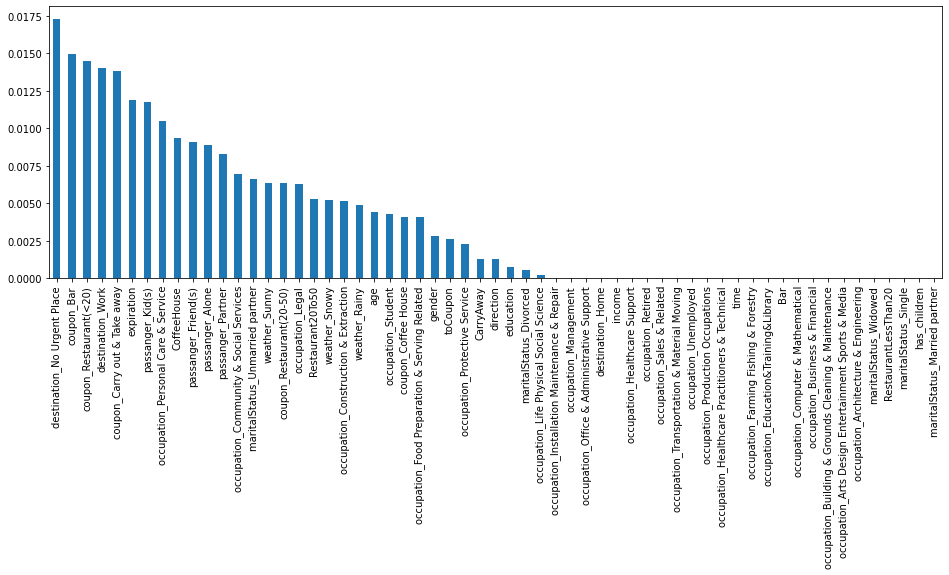

In [67]:
ax = mutual_info.plot.bar(figsize=(16,5))
figure = ax.get_figure()
figure.savefig('Feature importance.png')

##Hyperparameter tuning using 10-fold GridSearchCV on RandomForestClassifier

In [68]:
# Number of trees in random forest
n_estimators = [50,100,200,300,400,500]#[int(x) for x in np.linspace(start = 10, stop = 100, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [2,4]
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2,]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [69]:
# Create the param grid
param_grid = { 'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(param_grid)

{'n_estimators': [50, 100, 200, 300, 400, 500], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


In [70]:
rf_Model = RandomForestClassifier(criterion='entropy')

In [71]:
from sklearn.model_selection import GridSearchCV
rf_Grid = GridSearchCV(estimator = rf_Model, param_grid = param_grid, cv = 10, verbose=2, n_jobs = 4)

In [72]:
rf_Grid.fit(X_train, y_train)

Fitting 10 folds for each of 192 candidates, totalling 1920 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(criterion='entropy'),
             n_jobs=4,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 4],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 100, 200, 300, 400, 500]},
             verbose=2)

In [73]:
rf_Grid.best_params_

{'bootstrap': False,
 'max_depth': 4,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 300}

In [74]:
predict = rf_Grid.predict(X_test)

In [75]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_test,predict))
print(accuracy_score(y_test,predict))
print(classification_report(y_test,predict))


[[ 677  868]
 [ 248 1831]]
0.6920529801324503
              precision    recall  f1-score   support

           0       0.73      0.44      0.55      1545
           1       0.68      0.88      0.77      2079

    accuracy                           0.69      3624
   macro avg       0.71      0.66      0.66      3624
weighted avg       0.70      0.69      0.67      3624



##Hyperparameter tuning using 10-fold GridSearchCV on K-NN 

In [76]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=3)

In [77]:
k=GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 50),
                         'weights': ['uniform', 'distance']},
              cv = 10, verbose=2, n_jobs = 4)

In [78]:
k.fit(X_train,y_train)
predict = k.predict(X_test)

Fitting 10 folds for each of 98 candidates, totalling 980 fits


In [79]:
k.best_params_

{'n_neighbors': 27, 'weights': 'distance'}

In [80]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_test,predict))
print(accuracy_score(y_test,predict))
print(classification_report(y_test,predict))


[[ 809  736]
 [ 402 1677]]
0.6859823399558499
              precision    recall  f1-score   support

           0       0.67      0.52      0.59      1545
           1       0.69      0.81      0.75      2079

    accuracy                           0.69      3624
   macro avg       0.68      0.67      0.67      3624
weighted avg       0.68      0.69      0.68      3624



##Hyperparameter tuning using 10-fold GridSearchSV on AdaBoost

In [81]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
abc = AdaBoostClassifier(base_estimator=RandomForestClassifier())

#int(x) for x in np.linspace(start = 10, stop = 50, num = 10)
parameters = {'base_estimator__min_samples_leaf':[5,7],
              'n_estimators':[10,15],
              'learning_rate':[1.0]}

clf = GridSearchCV(abc, parameters,cv=10,scoring='f1',n_jobs=4)
clf.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=AdaBoostClassifier(base_estimator=RandomForestClassifier()),
             n_jobs=4,
             param_grid={'base_estimator__min_samples_leaf': [5, 7],
                         'learning_rate': [1.0], 'n_estimators': [10, 15]},
             scoring='f1')

In [82]:
  clf.best_params_

{'base_estimator__min_samples_leaf': 7,
 'learning_rate': 1.0,
 'n_estimators': 10}

In [83]:
y_pred = clf.predict(X_test)
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))


[[1063  482]
 [ 358 1721]]
0.7682119205298014
              precision    recall  f1-score   support

           0       0.75      0.69      0.72      1545
           1       0.78      0.83      0.80      2079

    accuracy                           0.77      3624
   macro avg       0.76      0.76      0.76      3624
weighted avg       0.77      0.77      0.77      3624

